In [2]:
import pandas as pd
data = pd.read_csv("data/full_educational_data.csv", index_col=0)
data.head()

,LOCATION,PISASCIENCE,PISAMATH,PISAREADING,EDUPUBEXP,EDUPRIVATEEXP,STUDPERTEACHER,TEACHINGHR,INSTRUCTTIME,GDP,TAXREV
0,AUS,503,491,503,19954.495,19954.495,14.926000,844.353083,11000.00000,1323863.624,401.232
1,AUT,490,499,484,26488.460,26488.460,11.073000,658.200000,6420.00000,503361.417,192.155
2,BEL,499,508,493,13297.550,13297.550,11.083500,NaN,NaN,600269.926,238.347
3,CAN,518,512,520,11771.410,11771.410,16.691000,762.305877,8289.23755,1849252.231,576.768
4,CZE,497,499,490,16024.522,16024.522,14.722667,789.062500,7056.00000,437355.916,87.088


In [3]:
data.isnull().sum()

LOCATION          0
PISASCIENCE       0
PISAMATH          0
PISAREADING       0
EDUPUBEXP         2
EDUPRIVATEEXP     4
STUDPERTEACHER    2
TEACHINGHR        4
INSTRUCTTIME      5
GDP               0
TAXREV            3
dtype: int64

array([[<Axes: title={'center': 'PISASCIENCE'}>,
        <Axes: title={'center': 'PISAMATH'}>,
        <Axes: title={'center': 'PISAREADING'}>],
       [<Axes: title={'center': 'EDUPUBEXP'}>,
        <Axes: title={'center': 'EDUPRIVATEEXP'}>,
        <Axes: title={'center': 'STUDPERTEACHER'}>],
       [<Axes: title={'center': 'TEACHINGHR'}>,
        <Axes: title={'center': 'INSTRUCTTIME'}>,
        <Axes: title={'center': 'GDP'}>],
       [<Axes: title={'center': 'TAXREV'}>, <Axes: >, <Axes: >]],
      dtype=object)

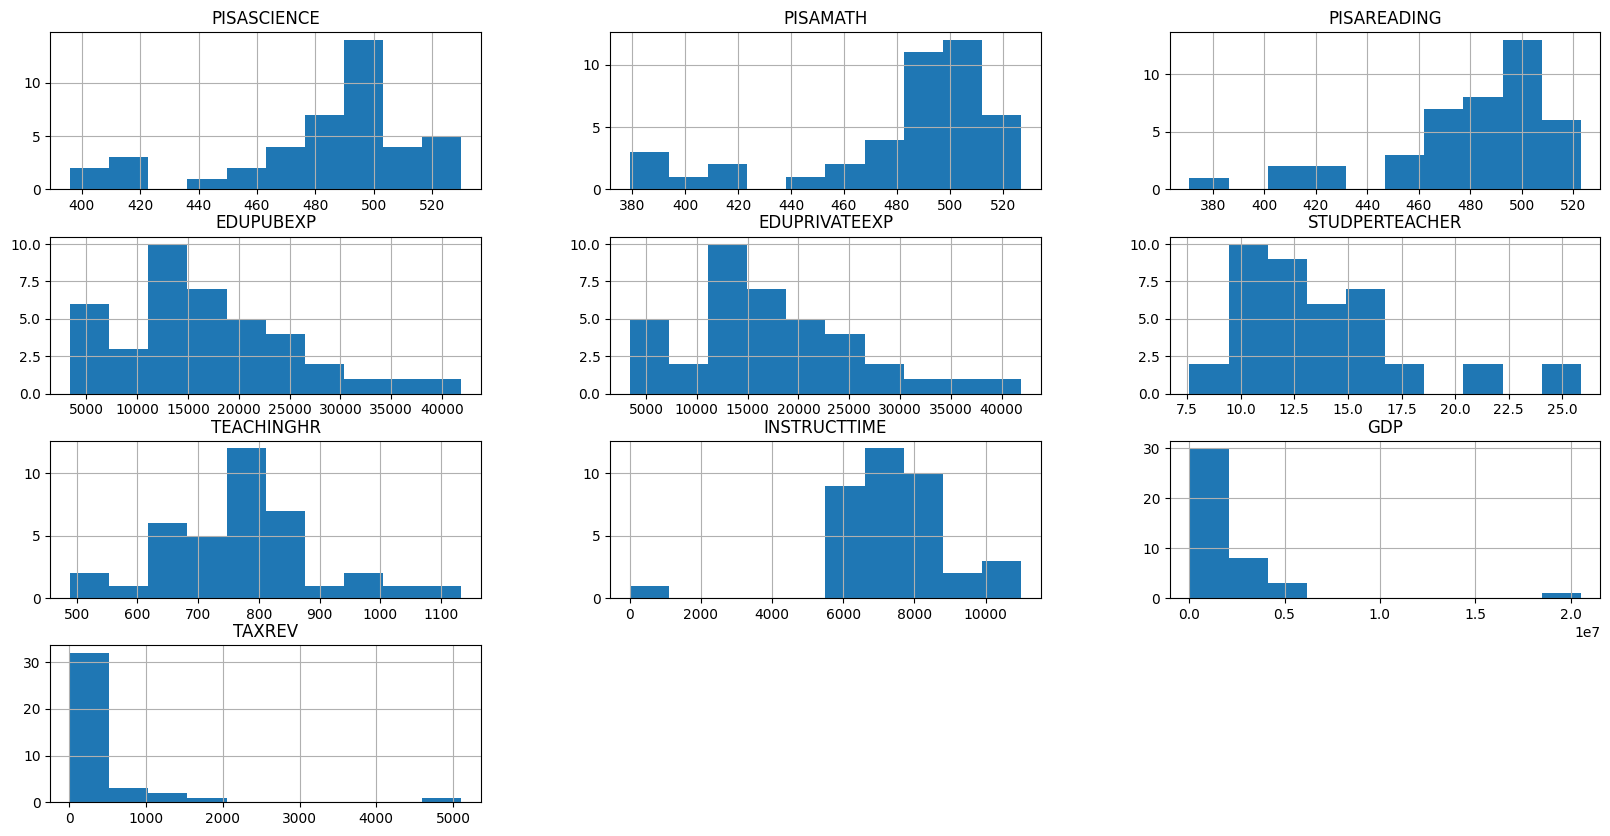

In [4]:
data.hist(figsize=(20, 10))

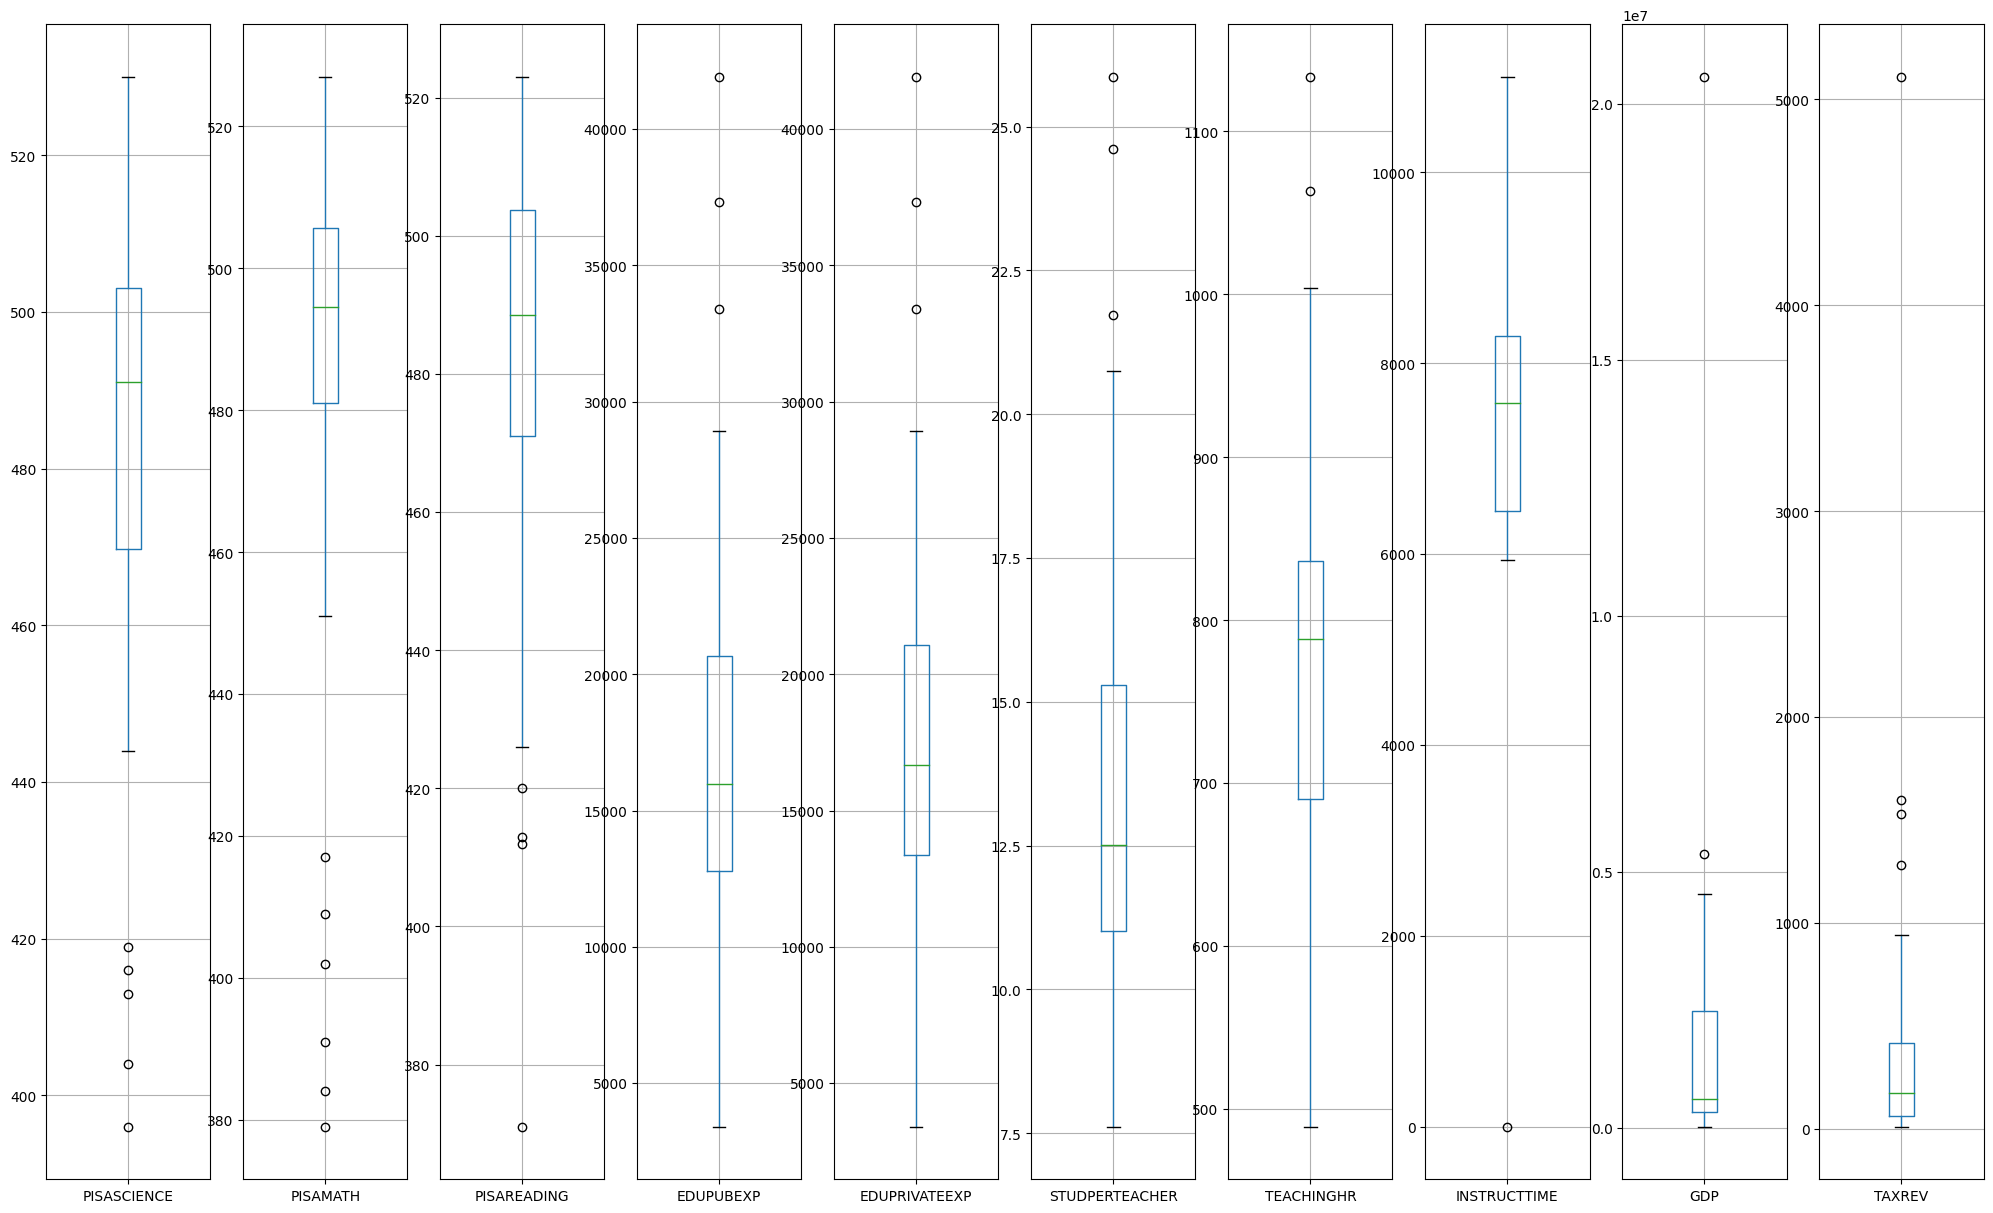

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(25, 15))

plots = data.iloc[:, 1:].shape[1]

for idx, column in enumerate(data.iloc[:, 1:]):
    plt.subplot(1, plots, idx + 1)
    data.boxplot([column])

plt.show()

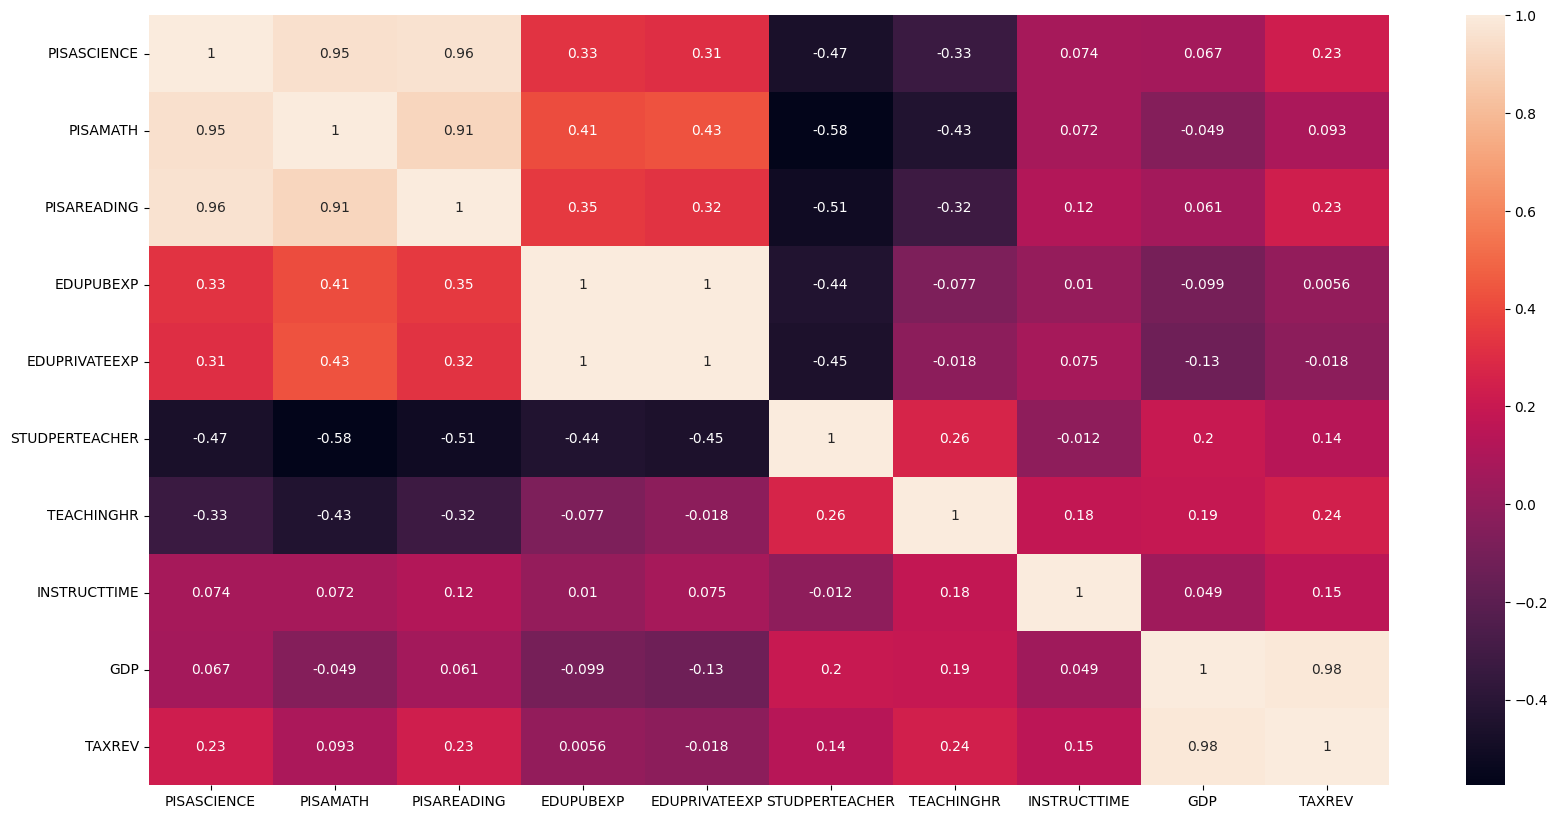

In [7]:
import seaborn as sns
figure(figsize=(20, 10))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [8]:
import math
import plotly.graph_objects as go
from plotly.subplots import make_subplots

row_length = 5
show_top = 10
col_names = data.iloc[:, 1:].columns

fig = make_subplots(rows= int(len(col_names) / row_length), 
                    cols=row_length,
                    vertical_spacing=0.01,
                    horizontal_spacing=0.01,
                    specs=[[{"type": "table"} for x in range(row_length)], [{"type": "table"} for x in range(row_length)]])

for idx, column in enumerate(data.iloc[:, 1:]):
  temp_table = data[['LOCATION', column]].sort_values(by=[column], ascending=False)
  fig.add_trace(
      go.Table(header = dict(values = temp_table.columns),
               cells = dict(values = [temp_table.iloc[:show_top, 0].values, temp_table.iloc[:show_top, 1].values])),
      row = math.ceil((idx + 1) / 5), col = idx % row_length + 1
      )
fig.update_layout(title_text="Top 10 For each Category", margin=dict(r=5, l=5, t=30, b=5))
fig.show()

In [19]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

def xg_reg_function(target_column, feature_columns):
  X, y = data[feature_columns], data[target_column]
  # data_dmatrix = xgb.DMatrix(data=X,label=y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
  xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')
  xg_reg.fit(X_train,y_train)
  preds = xg_reg.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, preds))
  print(f"{target_column} RMSE: {rmse}")
  xgb.plot_importance(xg_reg)
  figure(figsize=(10, 10))
  plt.show()

PISAMATH RMSE: 22.880302671871213


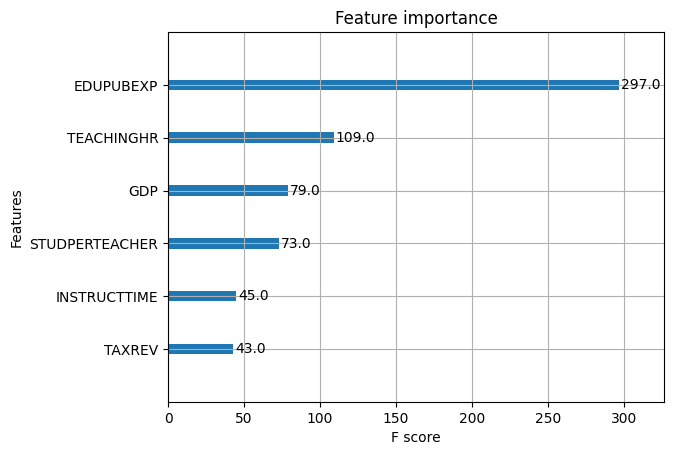

<Figure size 1000x1000 with 0 Axes>

PISASCIENCE RMSE: 27.829049323823757


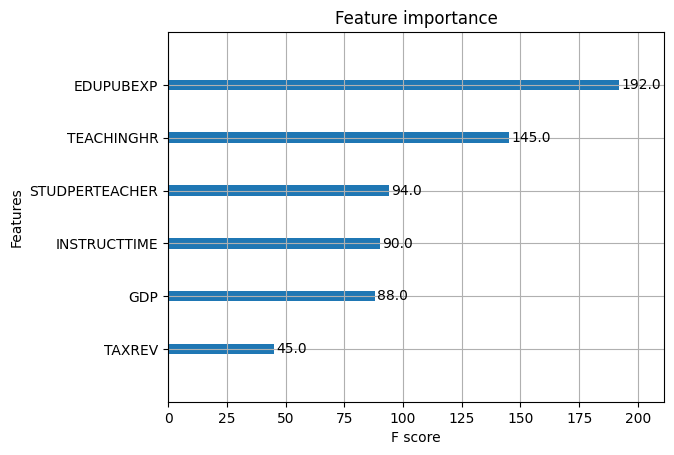

<Figure size 1000x1000 with 0 Axes>

PISAREADING RMSE: 29.889825095138924


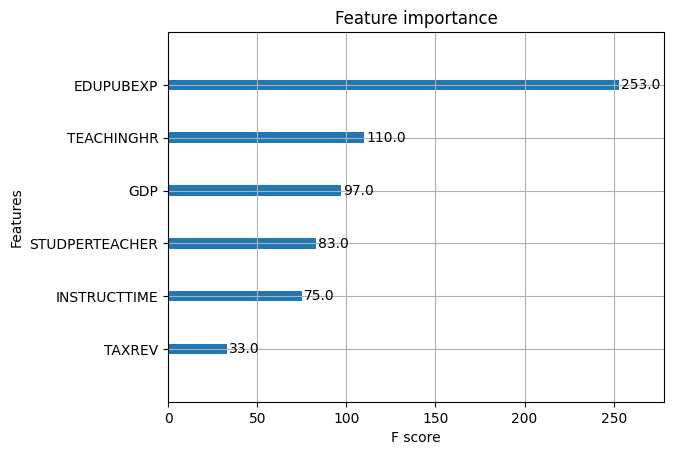

<Figure size 1000x1000 with 0 Axes>

In [20]:
feature_columns = ['EDUPUBEXP', 'EDUPRIVATEEXP', 'STUDPERTEACHER', 'TEACHINGHR', 'INSTRUCTTIME', 'GDP', 'TAXREV']
target_columns = ['PISAMATH', 'PISASCIENCE', 'PISAREADING']

for col in target_columns:
  xg_reg_function(col, feature_columns)

In [21]:
# Create dataframe without NAs and zeros in EDUPUBEXP for Plotly charts
data_nona = data[(data['EDUPUBEXP'].notna()) & (data['PISAMATH'].notna())]
data_nona = data_nona.fillna(0)
data_nona.shape

(40, 11)

In [22]:
import plotly.express as px

fig = px.scatter(data_nona, 
                 x="EDUPUBEXP", 
                 y="PISAMATH", 
                 text="LOCATION",
                 size='INSTRUCTTIME',
                 color='PISAMATH',
                 size_max=60, 
                 trendline='ols')

fig.update_traces(textposition='top center')

fig.update_layout(
    height=800,
    title_text='PISA Math Scores and Instruction Time'
)

fig.show()

In [23]:
fig = px.scatter(data_nona, 
                 x="EDUPUBEXP", 
                 y="PISASCIENCE", 
                 text="LOCATION",
                 size='INSTRUCTTIME',
                 color='PISAMATH',
                 size_max=60, 
                 trendline='ols')

fig.update_traces(textposition='top center')

fig.update_layout(
    height=800,
    title_text='PISA Science Scores and Instruction Time'
)

fig.show()

In [24]:
fig = px.scatter(data_nona, 
                 x="EDUPUBEXP", 
                 y="PISASCIENCE", 
                 text="LOCATION",
                 size='INSTRUCTTIME',
                 color='PISAMATH',
                 size_max=60, 
                 trendline='ols')

fig.update_traces(textposition='top center')

fig.update_layout(
    height=800,
    title_text='PISA Science Scores and Instruction Time'
)

fig.show()